In [3]:
import pandas as pd
import numpy as np

summary_df = pd.read_csv("../data/waveform_summary.csv")
summary_df.shape
# summary_df.head()

(164269, 9)

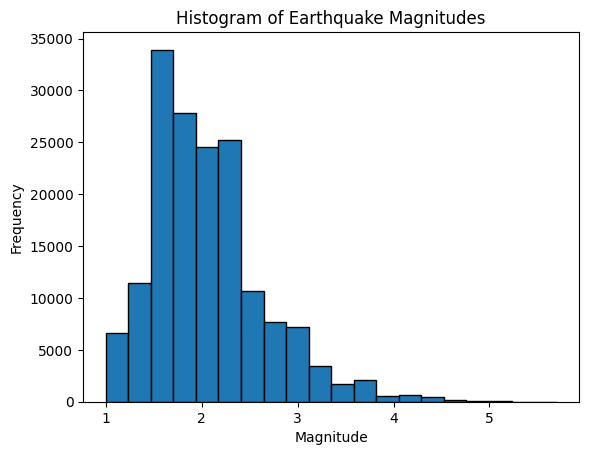

In [16]:
# create a histogram of magnitudes
import matplotlib.pyplot as plt

plt.hist(summary_df["magnitude"], bins=20, edgecolor='black')
plt.title("Histogram of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

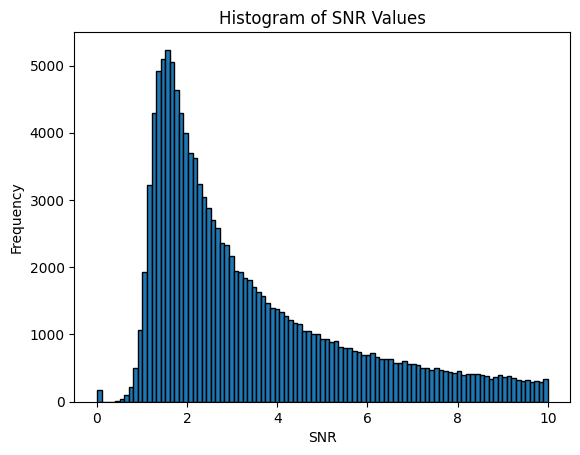

In [17]:
# for snr
# choose specific bins
# first, find the min snr column using the min of 3 columns snr1, snr2, snr3
# summary_df["snr_min"] = summary_df[["snr1", "snr2", "snr3"]].min(axis=1)
# summary_df["snr_mean"] = summary_df[["snr1", "snr2", "snr3"]].mean(axis=1)
summary_df["snr_max"] = summary_df[["snr1", "snr2", "snr3"]].max(axis=1)

plt.hist(summary_df["snr_max"].dropna(), bins=np.linspace(0, 10, 100), edgecolor='black')
plt.title("Histogram of SNR Values")
plt.xlabel("SNR")
plt.ylabel("Frequency")
plt.show()

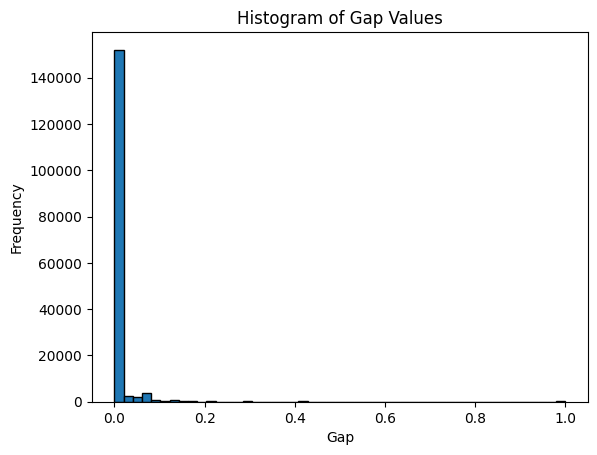

In [18]:
summary_df["gap_max"] = summary_df[["gap1", "gap2", "gap3"]].max(axis=1)

plt.hist(summary_df["gap_max"].dropna(), bins=np.linspace(0, 1, 50), edgecolor='black')
plt.title("Histogram of Gap Values")
plt.xlabel("Gap")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# low_snr_ratio = (summary_df["snr_max"] < 2).sum() / len(summary_df)
# print(f"Ratio of waveforms with SNR < 2: {low_snr_ratio:.2%}")

# find the number of rows where snr_max > 1.5 and gap_max = 0
snr_threshold = 1.5
high_snr_low_gap = summary_df[(summary_df["snr_max"] > snr_threshold) & (summary_df["gap_max"] == 0)]
ratio_high_snr_low_gap = len(high_snr_low_gap) / len(summary_df)
print(f"Ratio of waveforms with SNR > {snr_threshold} and Gap = 0: {ratio_high_snr_low_gap:.2%}")

Ratio of waveforms with SNR > 1.5 and Gap = 0: 78.65%


In [20]:
# save the high_snr_low_gap
high_snr_low_gap.to_csv("data/high_snr_low_gap_waveforms.csv", index=False)

Waveform File: ./data/waveforms/HH/20240325172238_LAP_HH.mseed, SNR: 2.0736435477158697


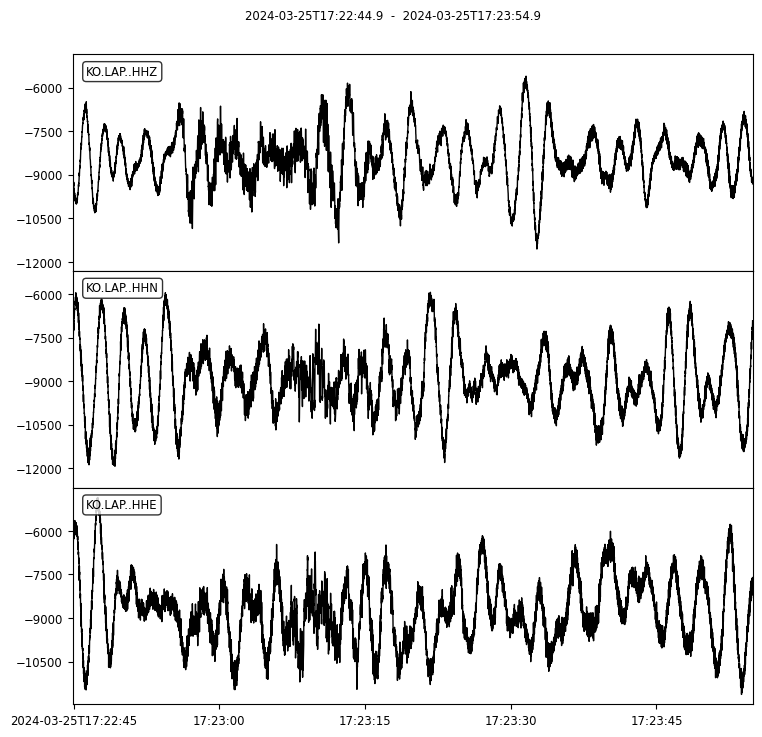

Waveform File: ./data/waveforms/HH/20231220234716_LAP_HH.mseed, SNR: 12.98743115118262


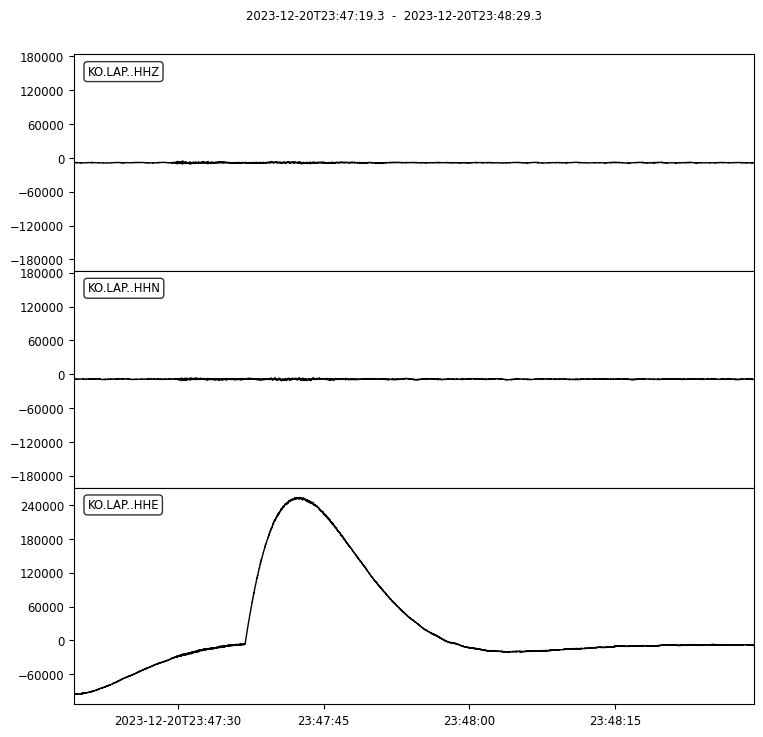

Waveform File: ./data/waveforms/HH/20210416145218_YAYO_HH.mseed, SNR: 1.9279648062526171


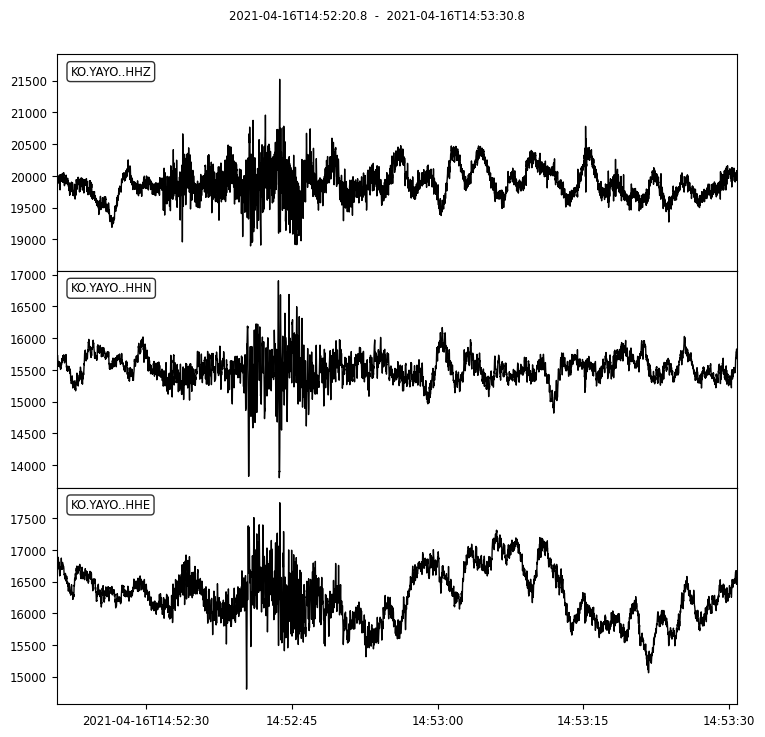

Waveform File: ./data/waveforms/HN/20230318222022_KRTL_HN.mseed, SNR: 1.60354652605138


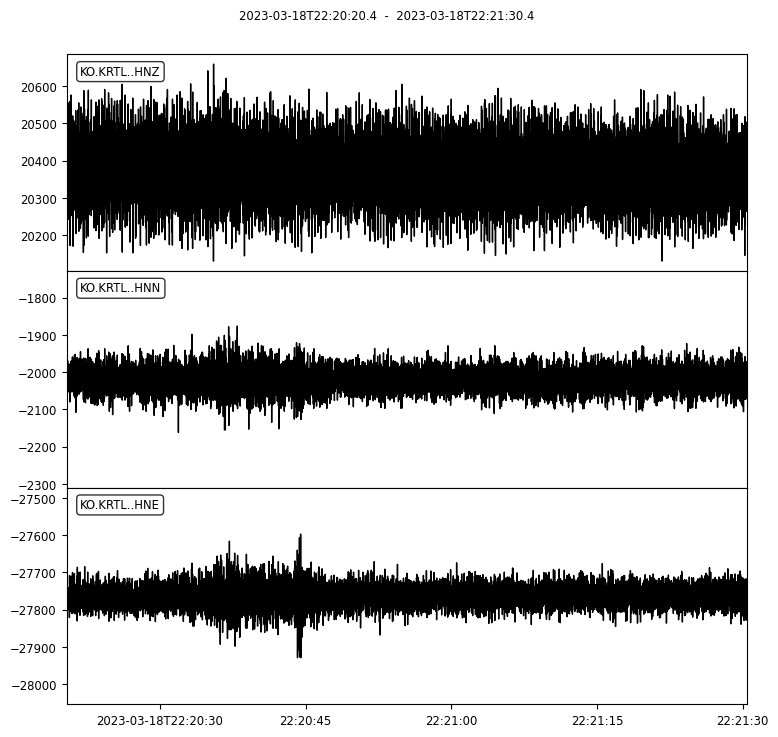

Waveform File: ./data/waveforms/HH/20230125010431_SAUV_HH.mseed, SNR: 2.060413892480184


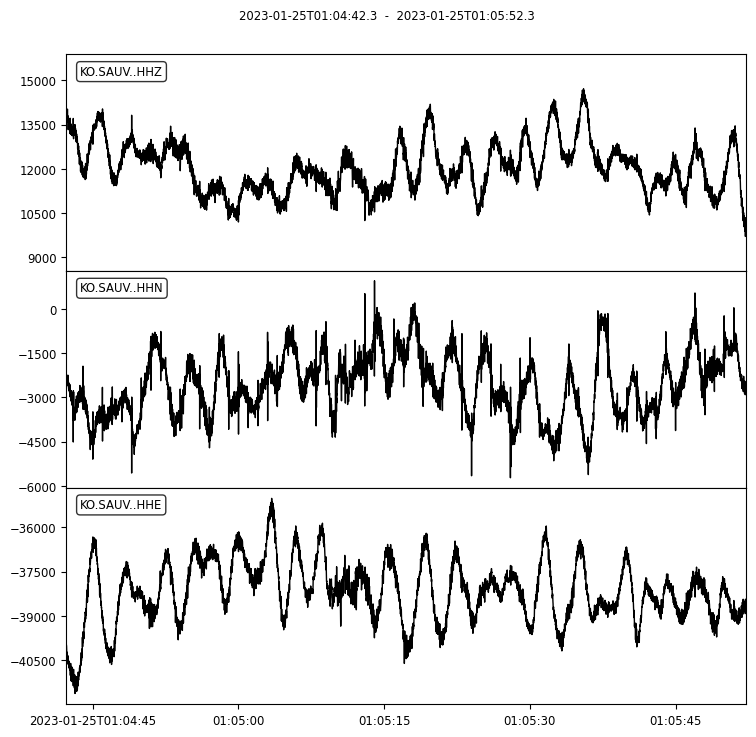

Waveform File: ./data/waveforms/HH/20160711015722_SAUV_HH.mseed, SNR: 6.719836314464103


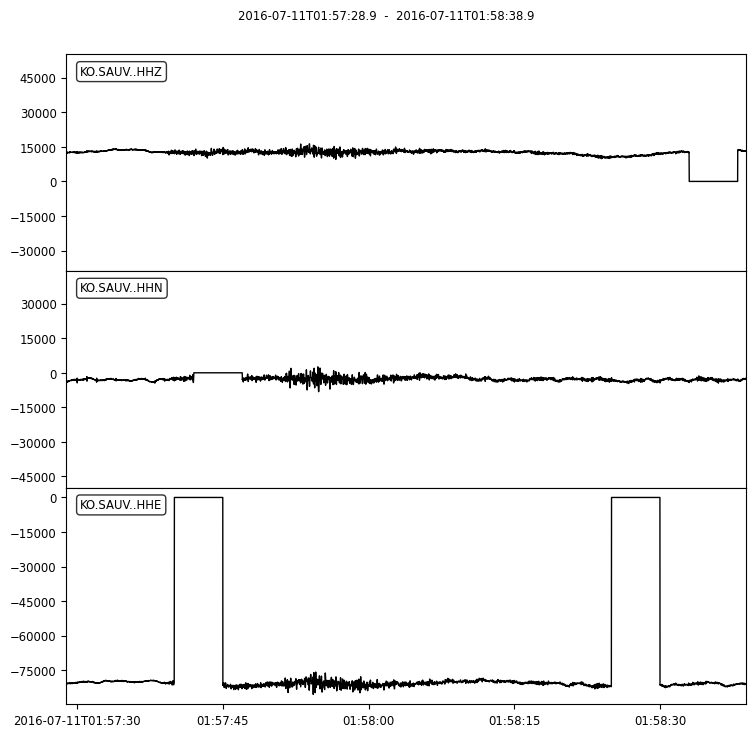

Waveform File: ./data/waveforms/HH/20170920213939_BGKT_HH.mseed, SNR: 1.606757095750732


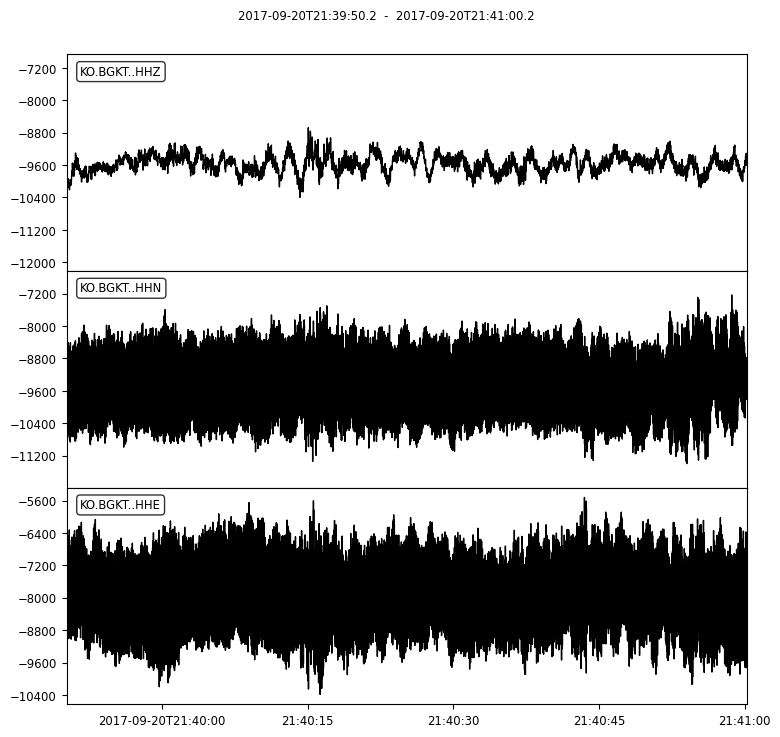

Waveform File: ./data/waveforms/HH/20171013092738_EDC_HH.mseed, SNR: 1.1094370674037288


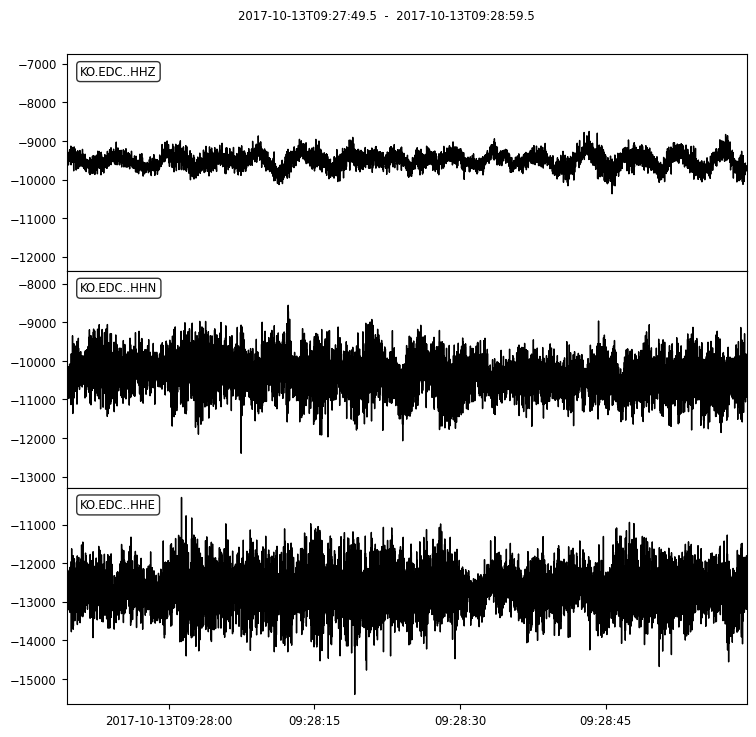

Waveform File: ./data/waveforms/HH/20171202123522_KAVV_HH.mseed, SNR: 1.9621933551704005


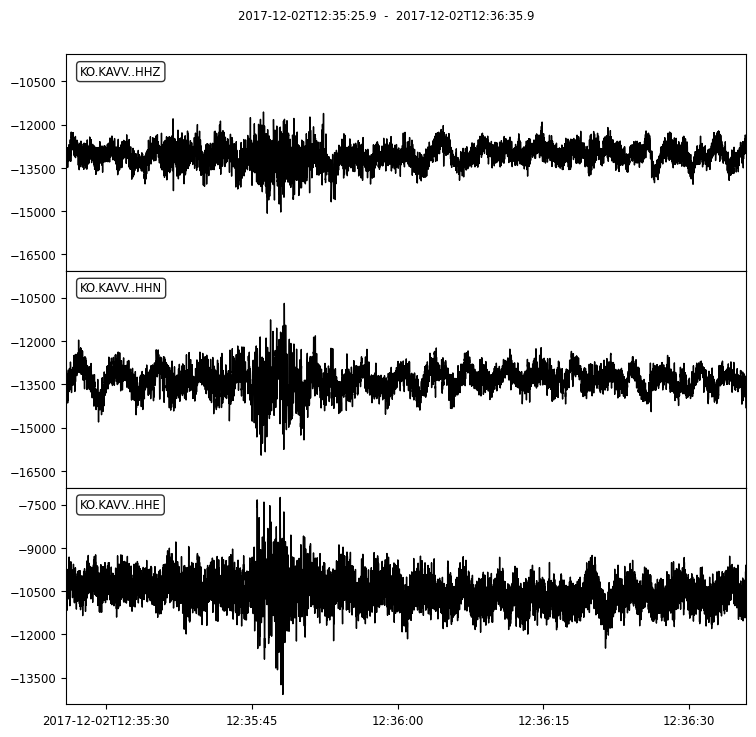

Waveform File: ./data/waveforms/HH/20230602065904_MRMT_HH.mseed, SNR: 2.095223925808704


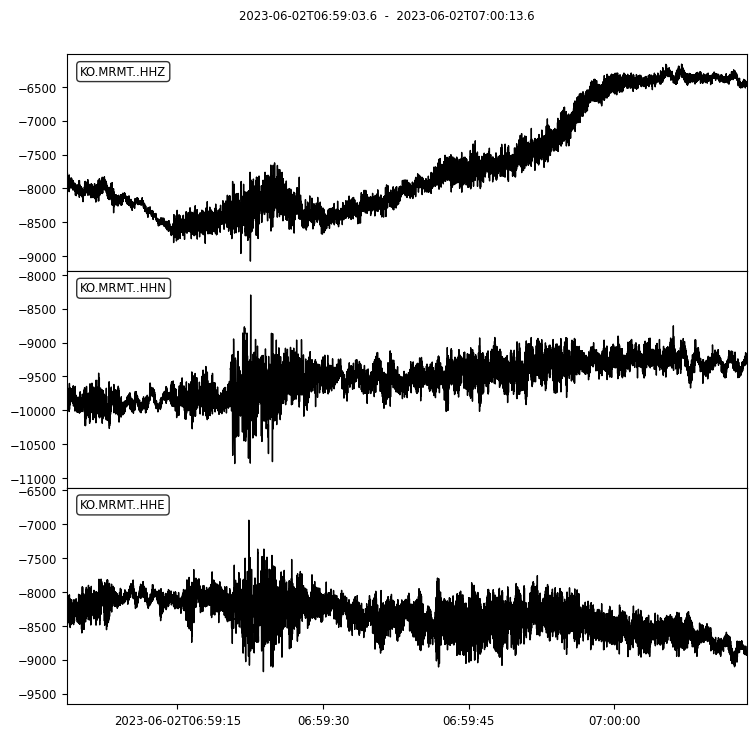

In [21]:
import obspy
# Show 10 random samples of waveforms and print the snrs
sampled_df = summary_df.sample(10)
for index, row in sampled_df.iterrows():
    print(f"Waveform File: {row['waveform_file']}, SNR: {row['snr_max']}")
    st = obspy.read(row['waveform_file'])
    st.plot()
    # plt.title(f"Waveform: {row['waveform_file']}, SNR: {row['snr']}")
    # plt.show()
